In [1]:
from qsextra import ExcitonicSystem
from qsextra.qcomo import qevolve, clevolve
import numpy as np
from scipy.linalg import toeplitz
import matplotlib.pyplot as plt

$$
\hat{H}^\text{e} = - \sum_{i=1}^N \frac{\epsilon_i}{2} \hat{\sigma}_i^z + \sum_{i=1}^{N-1} \sum_{j>i} J_{ij} \left( \hat{\sigma}_i^+\hat{\sigma}_j^- + \hat{\sigma}_i^- \hat{\sigma}_j^+ \right)
$$

$$
\frac{d \rho (t)}{dt} =
-i \left[ \hat{H}, \rho (t) \right] +
\gamma
\sum_{i=1}^N
\left(
\hat{\sigma}_i^z \rho (t) \hat{\sigma}_i^z -
\rho (t)
\right)
$$

In [2]:
epsilon = [1,2,3,4]
J = toeplitz([0., 1., 0., 1.])

In [3]:
esys = ExcitonicSystem(energies=epsilon, couplings=J)
esys.set_state(state_type='delocalized excitation', state=[1/np.sqrt(2), 1/np.sqrt(2), 0, 0])

c:\users\fede\desktop\progetti in corso\collision model spectroscopy\qsextra\qsextra\system\system.py:112: UserWarning: Equal dipole moments are considered.
  warnings.warn('Equal dipole moments are considered.')
c:\users\fede\desktop\progetti in corso\collision model spectroscopy\qsextra\qsextra\system\system.py:229: UserWarning: Coefficients have been normalized.
  warnings.warn('Coefficients have been normalized.')


In [4]:
esys.get_e_Hamiltonian()

Quantum object: dims = [[2, 2, 2, 2], [2, 2, 2, 2]], shape = (16, 16), type = oper, isherm = True
Qobj data =
[[-5.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. -4.  1.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1. -3.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. -2.  0.  1.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0. -2.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0. -1.  1.  0.  0.  1.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  1.  0.  0.  1.  0.]
 [ 0.  1.  0.  0.  1.  0.  0.  0. -1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  1.  0.  0.  1.  1.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  2.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  1.  0.  2.  0.  0.  0.]
 [ 0.  0.  0.  0.  

In [5]:
esys.get_e_state()

Quantum object: dims = [[2, 2, 2, 2], [1, 1, 1, 1]], shape = (16, 1), type = ket
Qobj data =
[[0.        ]
 [0.70710678]
 [0.70710678]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]]

In [6]:
esys.todict()

{'system_type': qsextra.system.system.ExcitonicSystem,
 'system_size': 4,
 'e_el': [1, 2, 3, 4],
 'dipole_moments': [1.0, 1.0, 1.0, 1.0],
 'coupl_el': [[0.0, 1.0, 0.0, 1.0],
  [1.0, 0.0, 1.0, 0.0],
  [0.0, 1.0, 0.0, 1.0],
  [1.0, 0.0, 1.0, 0.0]],
 'validity': True,
 'state_type': 'delocalized excitation',
 'state': [(0.7071067811865476+0j), (0.7071067811865476+0j), 0j, 0j]}

In [7]:
dt = 0.01
time = np.arange(0, 20, dt*20)
shots = 16000

### Unitary dynamics

Quantum algorithm (Qiskit Aer Simulation)

In [8]:
results = qevolve(esys, time, shots=shots, dt=dt)

P = np.zeros((len(epsilon), time.size))
counts = results.get_counts()
for nc, c in enumerate(counts):
    for i in range(len(epsilon)):
        try:
            P[i,nc] = c['{:b}'.format(1<<i).zfill(len(epsilon))]/shots
        except:
            P[i,nc] = 0

Start creating the circuits...
Circuits created...
Start measuring the circuits...
The strongest of us sometimes have the hardest time fighting what's on the inside. [Po]


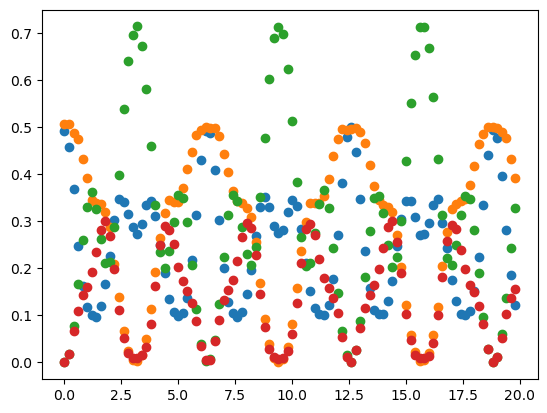

In [9]:
[plt.scatter(time, P[i,:]) for i in range(len(epsilon))]

Classical algorithm (Qutip sevolve)

In [10]:
t_list = np.arange(0, 20, dt)
results_qutip = clevolve(esys, t_list, measure_populations = True)

P_qutip = results_qutip.expect
error = []
for i in range(len(epsilon)):
    error.append(np.sqrt(P_qutip[i] * (np.ones_like(P_qutip[i]) - P_qutip[i]) / shots))

You must let go of the illusion of control. [Master Oogway]


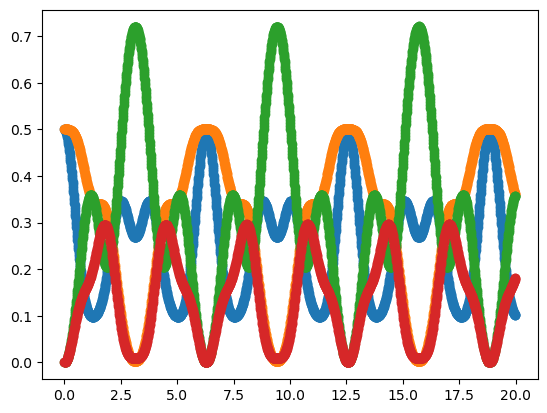

In [11]:
[plt.scatter(t_list, P_qutip[i]) for i in range(len(epsilon))]

Comparison:
- P1

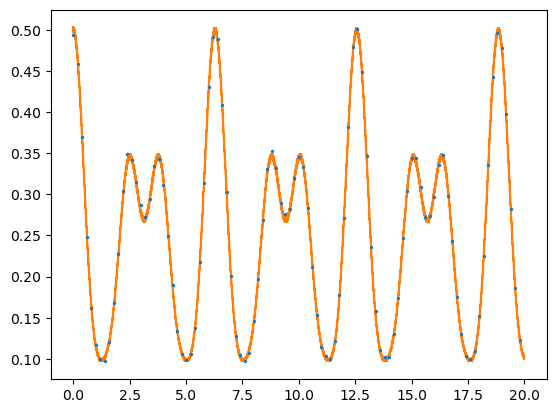

In [12]:
plt.errorbar(t_list, P_qutip[0], yerr=error[0], c='tab:orange', zorder=-1)
plt.scatter(time, P[0,:], s=2, c='tab:blue', zorder=1)

- P2

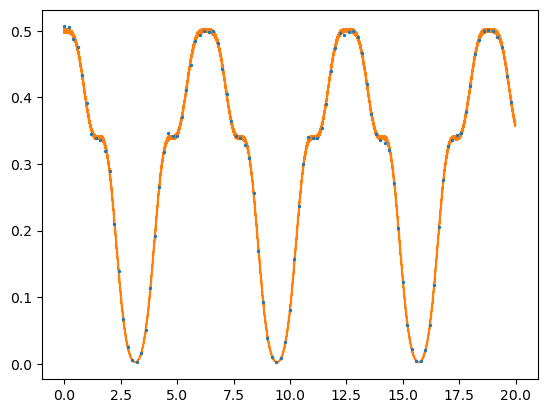

In [13]:
plt.errorbar(t_list, P_qutip[1], yerr=error[1], c='tab:orange', zorder=-1)
plt.scatter(time, P[1,:], s=2, c='tab:blue', zorder=1)

- P3

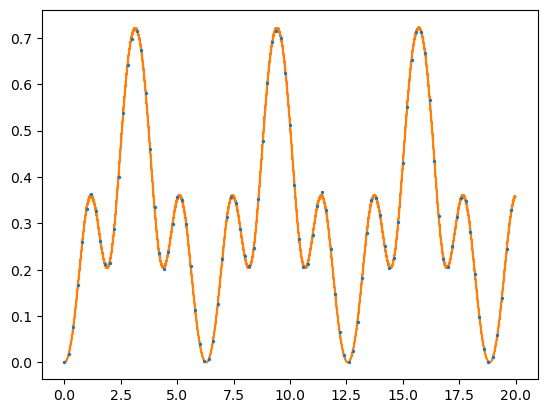

In [14]:
plt.errorbar(t_list, P_qutip[2], yerr=error[2], c='tab:orange', zorder=-1)
plt.scatter(time, P[2,:], s=2, c='tab:blue', zorder=1)

- P4

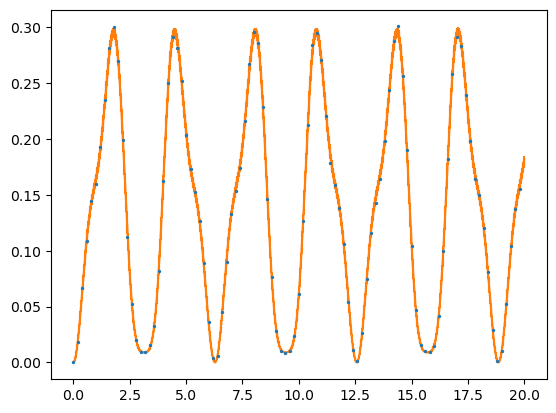

In [15]:
plt.errorbar(t_list, P_qutip[3], yerr=error[3], c='tab:orange', zorder=-1)
plt.scatter(time, P[3,:], s=2, c='tab:blue', zorder=1)

### Dephasing

In [16]:
coll_rate = 0.1

Quantum algorithm (Qiskit Aer Simulation)

In [17]:
results = qevolve(esys, time, shots=shots, dt=dt, coll_rates=coll_rate)

P = np.zeros((len(epsilon), time.size))
counts = results.get_counts()
for nc, c in enumerate(counts):
    for i in range(len(epsilon)):
        try:
            P[i,nc] = c['{:b}'.format(1<<i).zfill(len(epsilon))]/shots
        except:
            P[i,nc] = 0

Start creating the circuits...
Circuits created...
Start measuring the circuits...
There are no coincidences in this world. [Master Oogway]


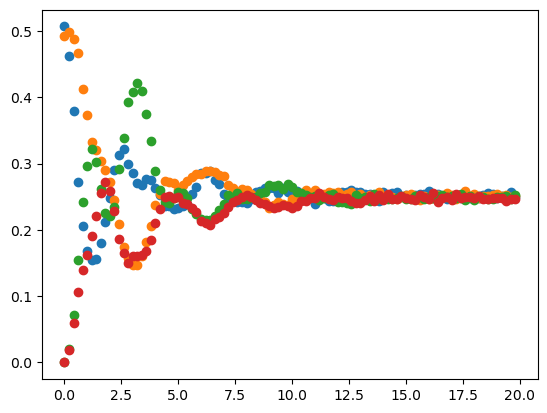

In [18]:
[plt.scatter(time, P[i,:]) for i in range(len(epsilon))]

Classical algorithm (Qutip mevolve)

In [19]:
t_list = np.arange(0, 20, dt)
results = clevolve(esys, t_list, coll_rate, measure_populations = True)

P_qutip = results.expect
error = []
for i in range(len(epsilon)):
    error.append(np.sqrt(P_qutip[i] * (np.ones_like(P_qutip[i]) - P_qutip[i]) / shots))

We do not wash our pits in the pool of sacred tears. [Master Shifu]


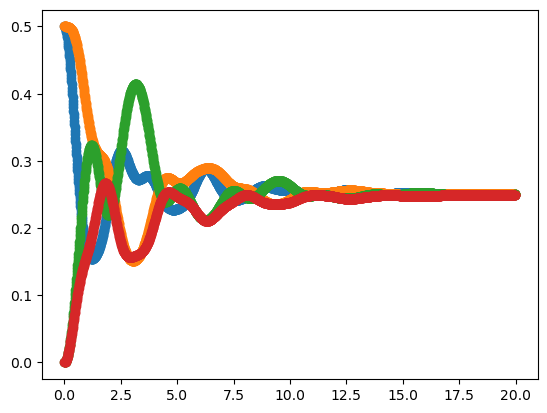

In [20]:
[plt.scatter(t_list, P_qutip[i]) for i in range(len(epsilon))]

Comparison:

- P1

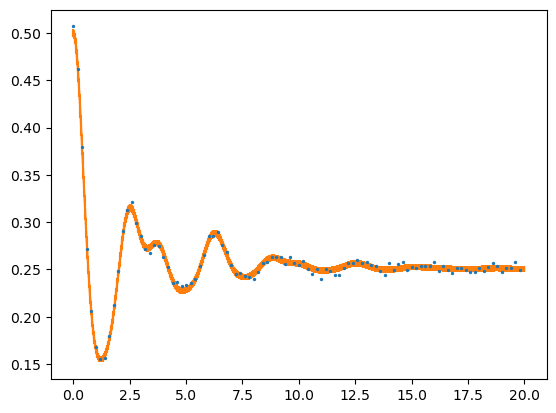

In [21]:
plt.errorbar(t_list, P_qutip[0], yerr=error[0], c='tab:orange', zorder=-1)
plt.scatter(time, P[0,:], s=2, c='tab:blue', zorder=1)

- P2

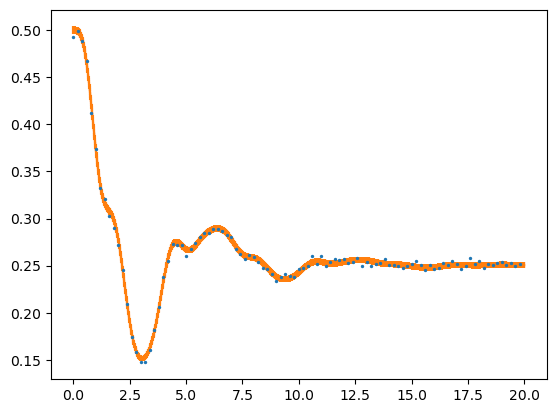

In [22]:
plt.errorbar(t_list, P_qutip[1], yerr=error[1], c='tab:orange', zorder=-1)
plt.scatter(time, P[1,:], s=2, c='tab:blue', zorder=1)

- P3

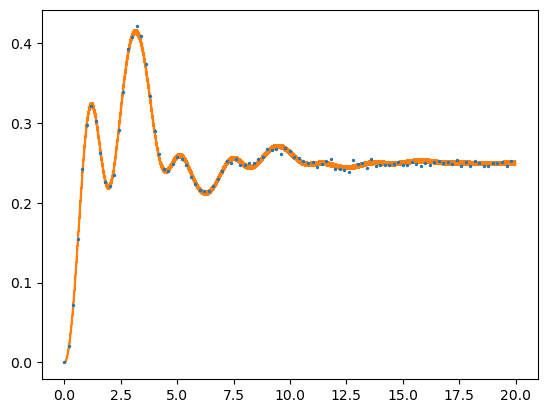

In [23]:
plt.errorbar(t_list, P_qutip[2], yerr=error[2], c='tab:orange', zorder=-1)
plt.scatter(time, P[2,:], s=2, c='tab:blue', zorder=1)

- P4

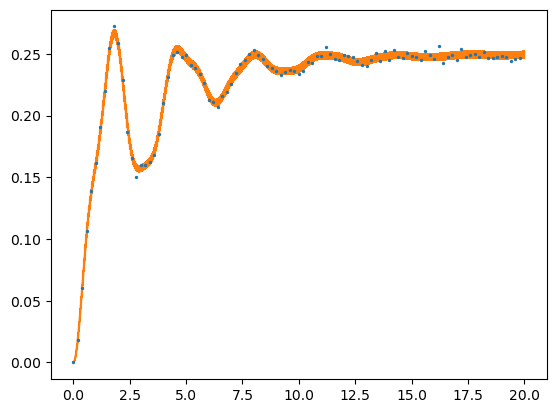

In [24]:
plt.errorbar(t_list, P_qutip[3], yerr=error[3], c='tab:orange', zorder=-1)
plt.scatter(time, P[3,:], s=2, c='tab:blue', zorder=1)